In [2]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns

from mmm_jay import *

from pymc_marketing.mmm.delayed_saturated_mmm import MMM
from pymc_marketing.mmm.transformers import geometric_adstock, logistic_saturation

warnings.filterwarnings("ignore", category=FutureWarning)

az.style.use("arviz-darkgrid")
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.dpi"] = 100

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

ModuleNotFoundError: No module named 'mmm_jay'

In [4]:
seed: int = sum(map(ord, "mmm"))
rng: np.random.Generator = np.random.default_rng(seed=seed)

# date range
min_date = pd.to_datetime("2018-04-01")
max_date = pd.to_datetime("2021-09-01")

df = pd.DataFrame(
    data={"date_week": pd.date_range(start=min_date, end=max_date, freq="W-MON")}
).assign(
    year=lambda x: x["date_week"].dt.year,
    month=lambda x: x["date_week"].dt.month,
    dayofyear=lambda x: x["date_week"].dt.dayofyear,
)

n = df.shape[0]
print(f"Number of observations: {n}")

Number of observations: 179


In [7]:
df

,date_week,year,month,dayofyear,x1,x2
0,2018-04-02,2018,4,92,0.318580,0.000000
1,2018-04-09,2018,4,99,0.112388,0.000000
2,2018-04-16,2018,4,106,0.292400,0.000000
3,2018-04-23,2018,4,113,0.071399,0.000000
4,2018-04-30,2018,4,120,0.386745,0.000000
...,...,...,...,...,...,...
174,2021-08-02,2021,8,214,0.033024,0.000000
175,2021-08-09,2021,8,221,0.165615,0.863349
176,2021-08-16,2021,8,228,0.171882,0.000000
177,2021-08-23,2021,8,235,0.280257,0.000000


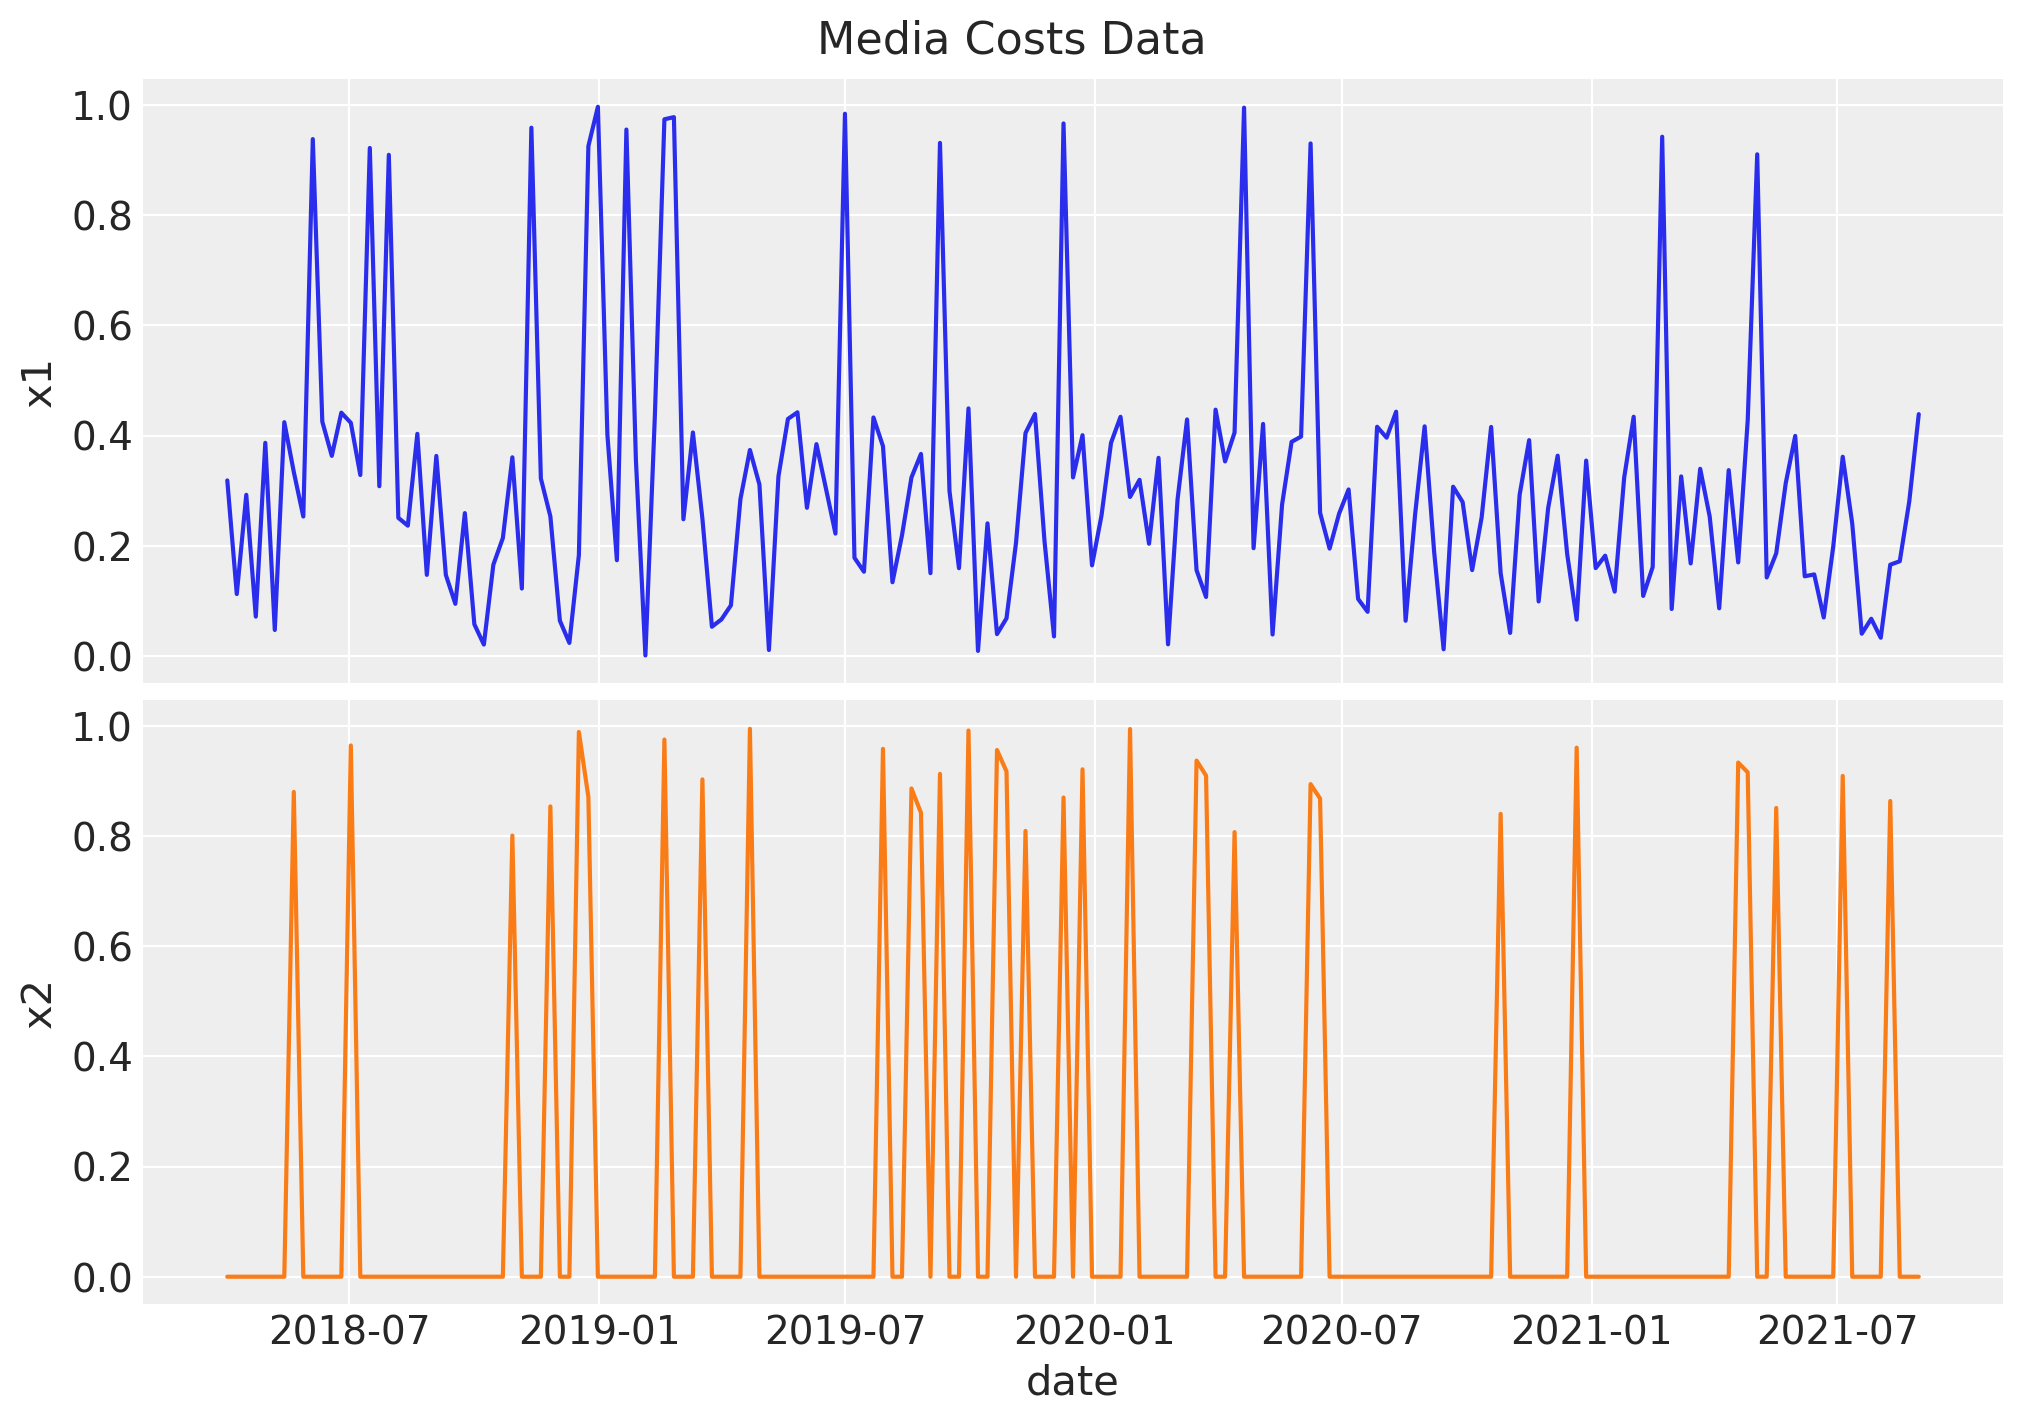

In [6]:
# media data
x1 = rng.uniform(low=0.0, high=1.0, size=n)
df["x1"] = np.where(x1 > 0.9, x1, x1 / 2)

x2 = rng.uniform(low=0.0, high=1.0, size=n)
df["x2"] = np.where(x2 > 0.8, x2, 0)


fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(10, 7), sharex=True, sharey=True, layout="constrained"
)
sns.lineplot(x="date_week", y="x1", data=df, color="C0", ax=ax[0])
sns.lineplot(x="date_week", y="x2", data=df, color="C1", ax=ax[1])
ax[1].set(xlabel="date")
fig.suptitle("Media Costs Data", fontsize=16);